# **MATERIAL DETECTION**

Detta kod bygger på OPENAI_CLIP
https://openai.com/research/clip
https://arxiv.org/abs/2103.00020


In [2]:
!install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=11.0

install: unrecognized option '--yes'
Try 'install --help' for more information.


In [3]:
!pip install ftfy regex tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.1 MB/s eta 0:00:00


In [4]:
!pip install git+https://github.com/openai/CLIP.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-qx0zhmez
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-qx0zhmez
  Resolved https://github.com/openai/CLIP.git to commit a9b1bf5920416aaeaec965c25dd9e8f98c864f16
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369398 sha256=0707a870271ced711fe0efc6282665e943d9fcd7960c034efa0b40c1384facb3
  Stored in directory: /tmp/pip-ephem-wheel-cache-rib11_w0/wheels/c8/e4/e1/11374c111387672fc2068dfbe0d4b424cb9cdd1b2e184a71b5
Successfully built clip


In [5]:
main_path = '/content/drive/MyDrive/Kandidatarbete - AI/AI_TESTS_UPCYCLING/CLIP-main'

In [30]:
image_end_path = f'{main_path}/fab1.png'

In [31]:
#Result: Value of predicted  

import torch
import clip
from PIL import Image
import numpy as np

#Main_Categories
material_list = ['Wood', 'Metal', 'Fabric', 'Plastic']


wood_lsit = ['oak', 'mahogony', 'maple', 'birch']
color_list = ['red', 'white', 'blue', 'black', 'green']

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

image = preprocess(Image.open(image_end_path)).unsqueeze(0).to(device)
text = clip.tokenize(material_list).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs)  # prints: [[0.9927937  0.00421068 0.00299572]]



Label probs: [[0.00345247 0.00879456 0.97891414 0.00883887]]


In [32]:
#Mapping Prediction to Category

#print(probs[0])
maximum = np.max(probs[0])
#print(maximum)

index = (np.where(probs[0] == maximum))[0][0]
#print(index)

material_prediction = material_list[index]

print("Material:", material_prediction)


Material: Fabric


In [33]:
#Mapping Prediction to Sub-category

#Sub_categories
color_list = ['red', 'white', 'blue', 'black', 'green']
wood_list = ['Ash', 'Birch', 'Cedar', 'Cherry', 'Cypress', 'Ebony', 'Mahogany', 'Maple', 'Oak', 'Pine', 'Redwood', 'Rosewood', 'Spruce', 'Teak', 'Walnut', 'Balsa', 'Fir', 'Hickory', 'Poplar', 'Sycamore']
fabric_list = ['Cotton', 'Polyester', 'Nylon', 'Silk', 'Wool', 'Rayon', 'Linen', 'Acrylic', 'Leather', 'Velvet', 'Fleece', 'Denim', 'Taffeta', 'Chiffon', 'Satin', 'Corduroy', 'Flannel', 'Cashmere', 'Lace', 'Tulle']
metal_list = ['Aluminum', 'Brass', 'Bronze', 'Cast Iron', 'Copper', 'Gold', 'Inconel', 'Iron', 'Lead', 'Magnesium', 'Nickel', 'Pewter', 'Platinum', 'Silver', 'Stainless Steel', 'Steel', 'Tin', 'Titanium', 'Zinc', 'Zirconium']

sub_category_list = list

if material_prediction == 'Wood':
  sub_category_list = wood_list
elif material_prediction == 'Fabric':
  sub_category_list = fabric_list
elif material_prediction == 'Metal':
  sub_category_list = metal_list
else:
  print("No Subcategories")


text = clip.tokenize(sub_category_list).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Subcategory:", probs)  # prints: [[0.9927937  0.00421068 0.00299572]]

maximum = np.max(probs[0])

index = (np.where(probs[0] == maximum))[0][0]

sub_material_prediction = sub_category_list[index]

print("Material:", sub_material_prediction)






Subcategory: [[2.3536816e-02 6.0336642e-02 3.5537360e-04 1.1029248e-03 9.1134906e-02
  2.2296369e-02 4.7218636e-01 2.0793315e-03 2.1632506e-04 4.4070082e-04
  3.8201179e-02 8.1233773e-03 3.0450538e-02 8.6915597e-02 1.5599099e-03
  1.2813555e-01 1.6591202e-02 8.6433655e-03 6.7452244e-03 9.4830664e-04]]
Material: Linen


# **COLOR DETECTION**

Detta kod bygger på GOOGLE VISION API
https://cloud.google.com/vision


In [20]:
!echo "deb [signed-by=/usr/share/keyrings/cloud.google.gpg] http://packages.cloud.google.com/apt cloud-sdk main" | sudo tee -a /etc/apt/sources.list.d/google-cloud-sdk.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key --keyring /usr/share/keyrings/cloud.google.gpg add -
!sudo apt-get update && sudo apt-get install google-cloud-sdk
!gcloud version

#Denna är bättre om det funkar!
#!pip install google-cloud-sdk

deb [signed-by=/usr/share/keyrings/cloud.google.gpg] http://packages.cloud.google.com/apt cloud-sdk main
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1210  100  1210    0     0  41724      0 --:--:-- --:--:-- --:--:-- 41724
OK
Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:8 http://packages.cloud.google.com/apt cloud-sdk InRelease [6,361 B]
Hit:9 http://ppa.launchpad.net/cran/libgit2/u

In [26]:
!pip install google-cloud-vision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.3/444.3 kB 8.1 MB/s eta 0:00:00


In [23]:
#Ta bort kommentarer om det är första gången
#from google.colab import auth
#auth.authenticate_user()

MessageError: ignored

In [24]:
import os

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = path = '/content/drive/MyDrive/Kandidatarbete - AI/AI_TESTS_UPCYCLING/upcycling-384213-02ce48f41103.json'


color: 64 93 89


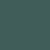

color: 190 196 191


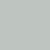

color: 90 123 118


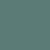

color: 122 156 153


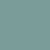

color: 37 66 63


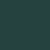

color: 151 160 155


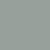

color: 212 192 173


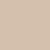

color: 220 182 164


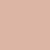

color: 163 195 191


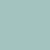

color: 69 88 88


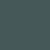

In [34]:
import io
from google.cloud import vision_v1
from PIL import Image


client = vision_v1.ImageAnnotatorClient()
with io.open(image_end_path, 'rb') as image_file:
    content = image_file.read()
image = vision_v1.Image(content=content)
response = client.image_properties(image=image)
props = response.image_properties_annotation
colors = props.dominant_colors.colors

main_color = colors[0]

for color in colors:
    red = int(color.color.red)
    green = int(color.color.green)
    blue = int(color.color.blue)

    print('color:', red, green, blue)
    
    img = Image.new('RGB', (50,50), color = (red, green, blue))
    img.show()



In [35]:
#VISION MATERIAL DETECTION

labels = response.label_annotations
for label in labels:
    if label.description in ['Cotton', 'Polyester', 'Nylon', 'Silk', 'Wool', 'Rayon', 'Linen', 'Acrylic', 'Leather', 'Velvet', 'Fleece', 'Denim', 'Taffeta', 'Chiffon', 'Satin', 'Corduroy', 'Flannel', 'Cashmere', 'Lace', 'Tulle']:
        print('Material type:', label.description)
        break
    els


### END **RESULT**

Material: Fabric
color: 64 93 89


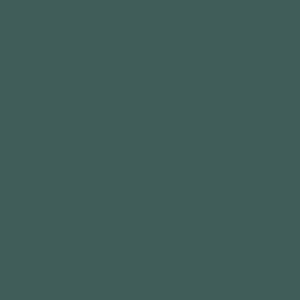

In [ ]:
print("Material:", material_prediction)

red = int(main_color.color.red)
green = int(main_color.color.green)
blue = int(main_color.color.blue)

print('color:', red, green, blue)
    
img = Image.new('RGB', (300,300), color = (red, green, blue))
img.show()


#**SAVE DATA TO DATABASE (SPREAD SHEET ÄR PUBLIC, OK?)**

In [ ]:
json_path = '/content/drive/MyDrive/Kandidatarbete - AI/AI_TESTS_UPCYCLING/upcycling-384213-02ce48f41103.json'
spreadsheet_id = '<SPREADSHEET-ID>'

In [ ]:
!pip install gspread google-auth


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.oauth2 import service_account

# Replace the path below with the path to your service account JSON file
path_to_json_file = json_path

# Authenticate using the service account JSON file
credentials = service_account.Credentials.from_service_account_file(path_to_json_file)

# Build the Drive and Sheets API client objects
drive_service = build('drive', 'v3', credentials=credentials)
sheets_service = build('sheets', 'v4', credentials=credentials)


NameError: ignored

In [ ]:
import random
import string

# Define function to generate random IDs
def generate_id(length):
    letters_and_digits = string.ascii_letters + string.digits
    return ''.join(random.choice(letters_and_digits) for _ in range(length))

# Open the Google Sheets spreadsheet
sheet = gc.open_by_key(spreadsheet_id).sheet1

# Generate random ID
new_id = generate_id(12)

# Check if ID already exists
cell_list = sheet.findall(new_id)
if cell_list:
    print("ID already exists in sheet")
else:
    # Append new row to sheet
    red = int(main_color.color.red)
    green = int(main_color.color.green)
    blue = int(main_color.color.blue)

    row = [new_id, 'Sitts', material_prediction, f'{red},{blue},{green}']
    sheet.append_row(row)
    print("New row added to sheet")


#**3D Recreation**